In [70]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# randomizedSearchCV 

### Importing training and testing data sets, eploratory analysis of features

In [34]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head() # display a few samples

V1      V2  V3   V4  V5  V6  V7    V8  V9  V10  ...  V33  V34  V35  \
3  3.932  3.2512   0  0.0   0   0   0  26.7   2    4  ...    0    0    1   
5  4.236  3.3944   0  0.0   0   0   0  29.4   2    4  ...    0    0    0   
6  4.236  3.4286   0  0.0   0   0   0  28.6   2    4  ...    0    0    0   
7  5.000  5.0476   1  0.0   0   0   0  11.1   0    3  ...    0    0    1   
8  4.525  3.8301   0  0.0   0   0   0  31.6   3    2  ...    0    0    0   

     V36    V37  V38    V39  V40  V41  Class  
3  3.076  2.417    0  7.601    0    0      2  
5  3.351  2.405    0  8.003    0    0      2  
6  3.351  2.556    0  7.904    0    0      2  
7  4.712  4.583    0  9.303    0    0      2  
8  3.379  2.143    0  7.950    0    0      2  

[5 rows x 42 columns]

V1 379; V2 823; V3 11; V4 4; V5 16; V6 10; V7 14; V8 172; V9 15; V10 11; V11 21; V12 307; V13 638; V14 321; V15 436; V16 24; V17 158; V18 115; V19 2; V20 4; V21 3; V22 322; V23 13; V24 2; V25 2; V26 3; V27 291; V28 174; V29 3; V30 372; V31 468; V32 8; V33 11; V34 16; V35 8; V36 603; V37 536; V38 8; V39 711; V40 5; V41 16; Class 2; 

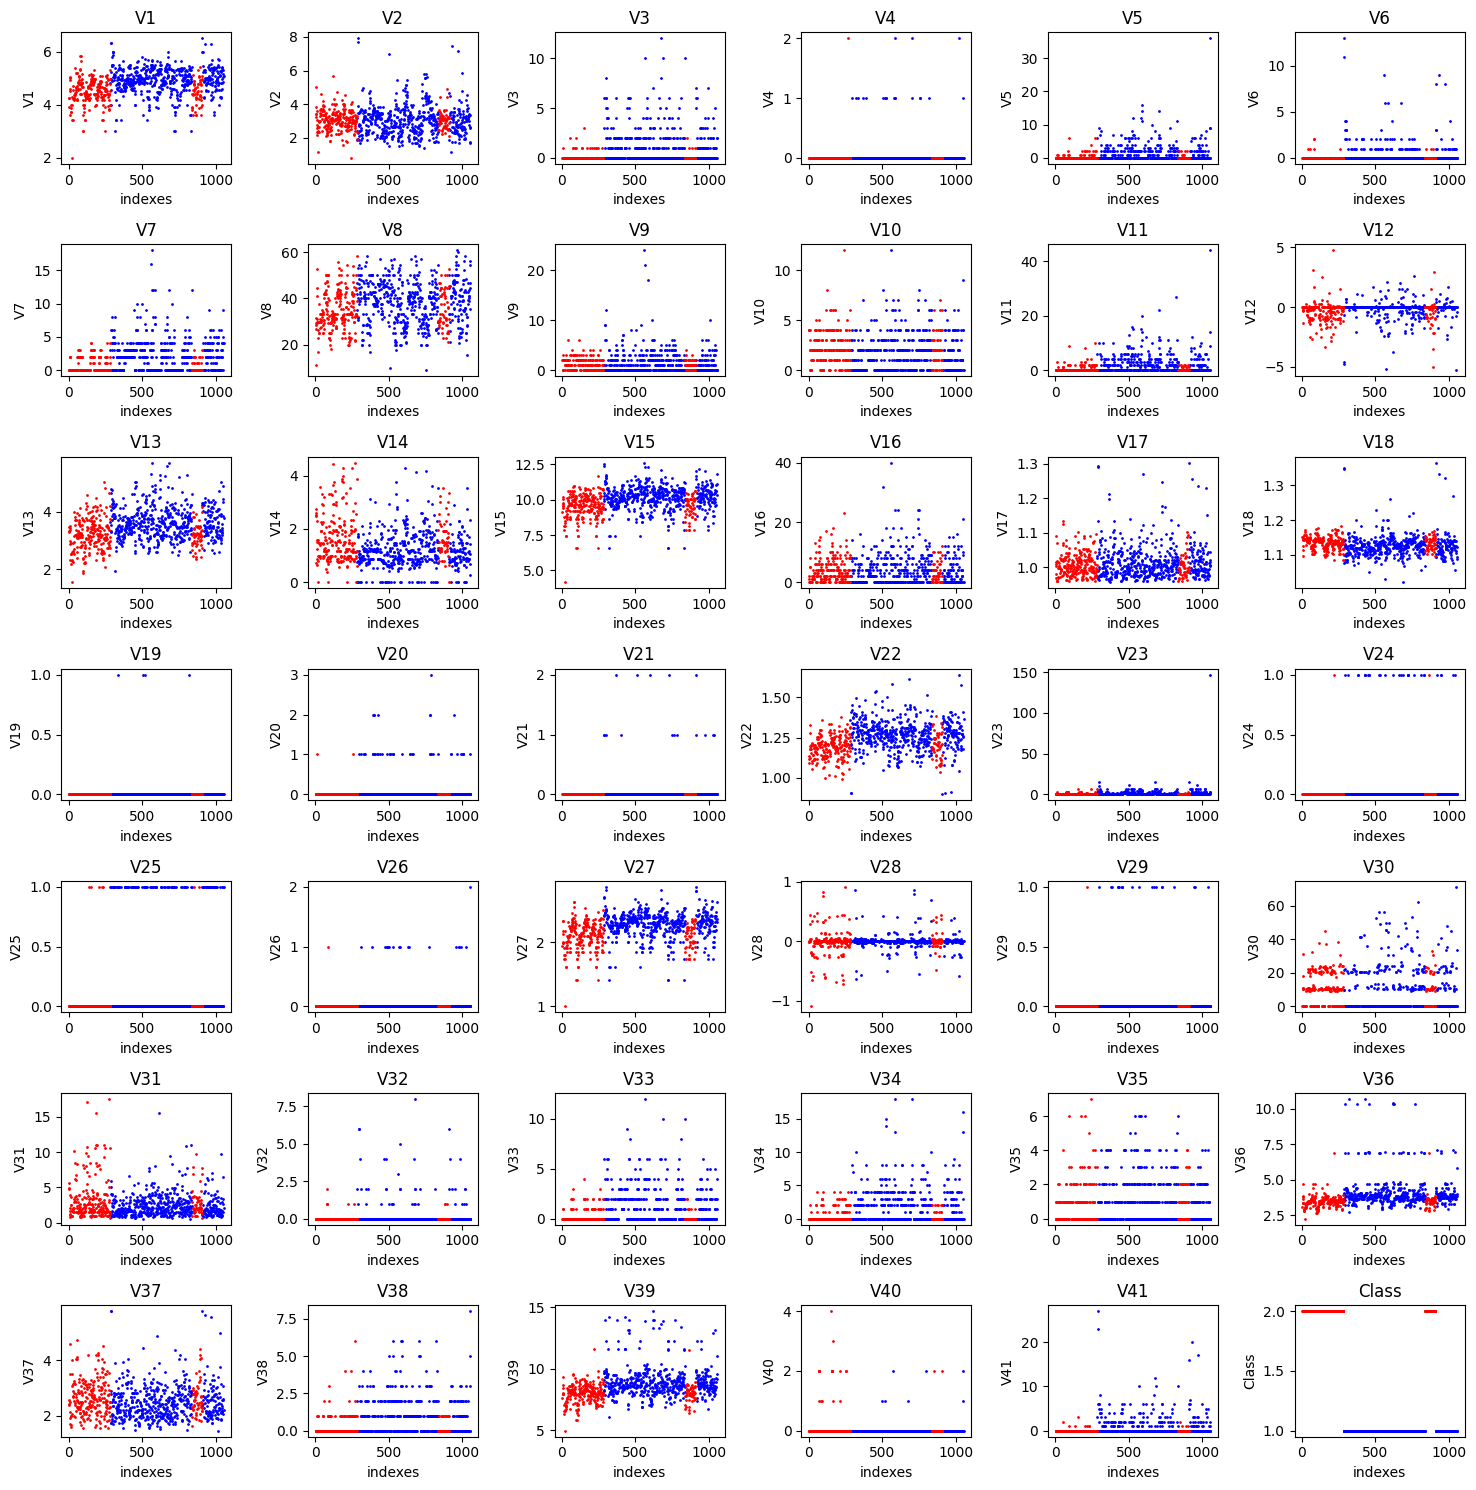

In [35]:
f = plt.figure(figsize=(15, 15))

for i, col in enumerate(train.columns):
    print(col, len(train[col].unique()), end="; ")
    f.add_subplot(7, 6, i+1)
    plt.title(col)
    plt.ylabel(col)
    plt.xlabel("indexes")
    plt.tight_layout()
    plt.plot(train[col][train['Class'] == 1], "bo", markersize="1")
    plt.plot(train[col][train['Class'] == 2], "ro", markersize="1")

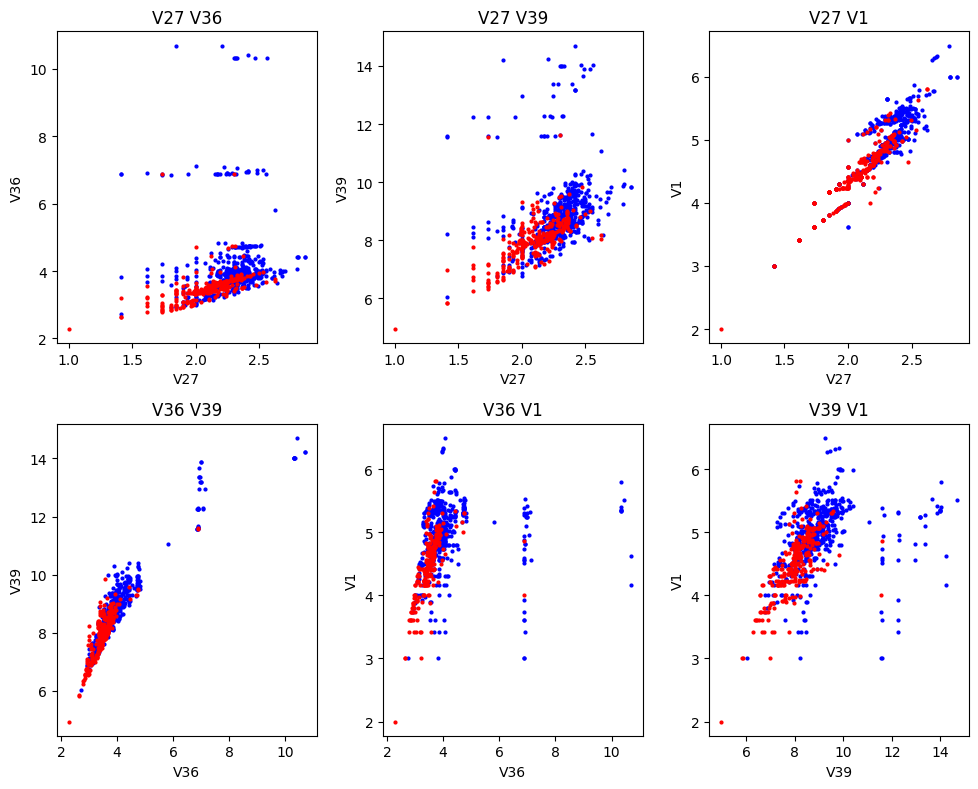

In [36]:
f = plt.figure(figsize=(10, 8))

b = [26, 35, 38, 0]
a = train.columns[b]

counter = 1
for i, col in enumerate(a):
    for j, col2 in enumerate(a[i+1:]):
        f.add_subplot(2, 3, counter)
        plt.title(col + " " + col2)
        plt.ylabel(col2)
        plt.xlabel(col)
        plt.tight_layout()
        plt.plot(train[col][train['Class'] == 1], train[col2][train['Class'] == 1], "bo", markersize="2")
        plt.plot(train[col][train['Class'] == 2], train[col2][train['Class'] == 2], "ro", markersize="2")
        counter += 1

plt.show()

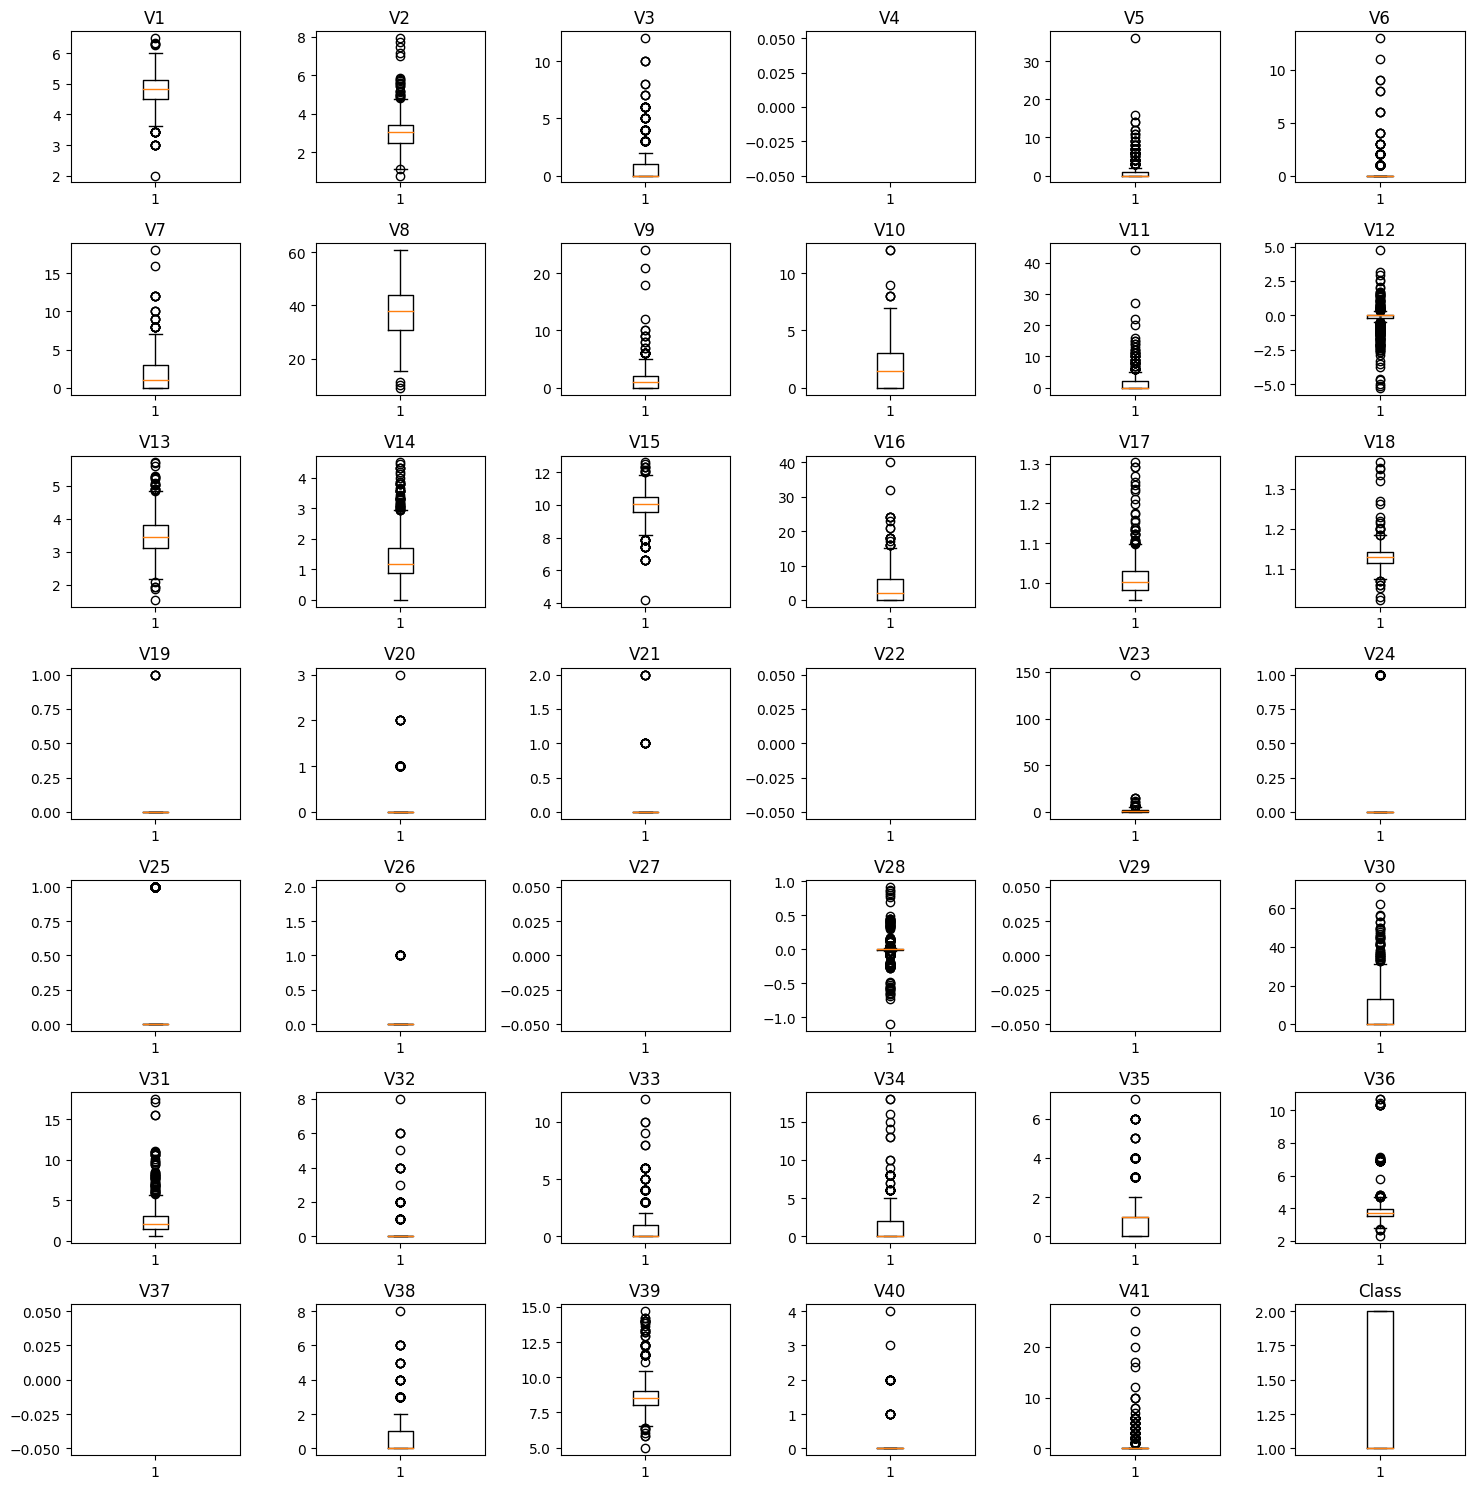

In [37]:
f = plt.figure(figsize=(15, 15))

for i, col in enumerate(train.columns):
    f.add_subplot(7, 6, i+1)
    plt.title(col)
    plt.tight_layout()
    plt.boxplot(train[col])

2.1 Exploration

Inspect the dataset. How balanced is the target variable? Are there any missing values present? If there
are, choose a strategy that takes this into account.
Most of your data is of the numeric type. Can you identify, by adopting exploratory analysis, whether
some features are directly related to the target? What about feature pairs? Produce at least three types of
visualizations of the feature space and be prepared to argue why these visualizations were useful for your
subsequent analysis.

Target variable distributions in test and training sets are close to [2/3 1/3].

Yes, there are some missing values. One possible strategy is to drop those that don't have all values. Some classifiers however don't really need all information, so you can just ignore missing rows for that specific attributes.

The visualizations are above. I haven't found anything very concrete some of the features are more and some less releted to target.

### Majority classifier

In [38]:
majority = train['Class'].value_counts()
majorityArr = np.array(majority)
print("Class distribution (train)")
print(majority)
print("Percentage:")
print(np.array(majorityArr[0] / np.sum(majorityArr)))

majorityTest = test['Class'].value_counts()
majorityTestArr = np.array(majorityTest)
print("Class distribution (test)")
print(majorityTest)
print("Percentage:")
print(np.array(majorityTestArr[0] / np.sum(majorityTestArr)))

Class distribution (train)
1    564
2    282
Name: Class, dtype: int64
Percentage:
0.6666666666666666
Class distribution (test)
1    135
2     74
Name: Class, dtype: int64
Percentage:
0.645933014354067


### Random classifier

There are two classes if we choose between them randomly accuracy is 1/2

### Preprocessing

In [39]:
# removing NA values from train dataframe
train = train.dropna()
# Separate input features (X) and target variable (y)
y = train.Class
X = train.drop('Class', axis=1)

testY = test.Class
testX = test.drop('Class', axis=1)

# le = LabelEncoder()
# y = le.fit_transform(y)
# testY = le.fit_transform(testY)


### Decision tree

In [69]:
clf_decitionTree = DecisionTreeClassifier(random_state=0)
clf_decitionTree.fit(X, y)

pred_y_decitionTree = clf_decitionTree.predict(testX)
print(accuracy_score(testY, pred_y_decitionTree))
prob_y_decisionTree = clf_decitionTree.predict_proba(testX)
prob_y_decisionTree = [p[1] for p in prob_y_decisionTree]
print(roc_auc_score(testY, prob_y_decisionTree))
print(f1_score(testY, pred_y_decitionTree))
print(precision_score(testY, pred_y_decitionTree))
print(recall_score(testY, pred_y_decitionTree))

0.8181818181818182
0.8043043043043043
0.8582089552238805
0.8646616541353384
0.8518518518518519


### KNN

In [56]:
clf_knn = KNeighborsClassifier(n_neighbors=9)
clf_knn.fit(X, y)

pred_y_knn = clf_knn.predict(testX)
print(accuracy_score(testY, pred_y_knn))
prob_y_knn = clf_knn.predict_proba(testX)
prob_y_knn = [p[1] for p in prob_y_knn]
print(roc_auc_score(testY, prob_y_knn))
print(f1_score(testY, pred_y_knn))
print(precision_score(testY, pred_y_knn))
print(recall_score(testY, pred_y_knn))

0.7894736842105263
0.8444944944944945
0.8307692307692307
0.864
0.8


### SVC / SVM

In [57]:
clf_svc = SVC(kernel='linear',  class_weight='balanced', probability=True)
clf_svc.fit(X, y)

pred_y_svc = clf_svc.predict(testX)
print(accuracy_score(testY, pred_y_svc))
prob_y_svc = clf_svc.predict_proba(testX)
prob_y_svc = [p[1] for p in prob_y_svc]
print(roc_auc_score(testY, prob_y_svc))
print(f1_score(testY, pred_y_svc))
print(precision_score(testY, pred_y_svc))
print(recall_score(testY, pred_y_svc))

0.8564593301435407
0.9178678678678679
0.8846153846153846
0.92
0.8518518518518519


### Random forest

In [58]:
clf_randomForest = RandomForestClassifier(random_state=1234)
clf_randomForest.fit(X, y)
pred_y_randomForest = clf_randomForest.predict(testX)
print(accuracy_score(testY, pred_y_randomForest))
prob_y_randomForest = clf_randomForest.predict_proba(testX)
prob_y_randomForest = [p[1] for p in prob_y_randomForest]
print(roc_auc_score(testY, prob_y_randomForest))
print(f1_score(testY, pred_y_randomForest))
print(precision_score(testY, pred_y_randomForest))
print(recall_score(testY, pred_y_randomForest))

0.8373205741626795
0.925025025025025
0.8740740740740742
0.8740740740740741
0.8740740740740741


### Ada boost

In [59]:
clf_adaboost = AdaBoostClassifier(n_estimators = 50, learning_rate = 0.2)
clf_adaboost.fit(X, y)

pred_y_adaboost = clf_adaboost.predict(testX)
print(accuracy_score(testY, pred_y_adaboost))
prob_y_adaboost = clf_adaboost.predict_proba(testX)
prob_y_adaboost = [p[1] for p in prob_y_adaboost]
print(roc_auc_score(testY, prob_y_adaboost))
print(f1_score(testY, pred_y_adaboost))
print(precision_score(testY, pred_y_adaboost))
print(recall_score(testY, pred_y_adaboost))

0.8516746411483254
0.8983483483483484
0.8888888888888888
0.8611111111111112
0.9185185185185185


In [45]:
# clf_xgboost = XGBClassifier(n_estimators = 1000, learning_rate = 0.05)
# clf_xgboost.fit(X, y)
# pred_y_xgboost = clf_xgboost.predict(testX)
# print(accuracy_score(testY, pred_y_xgboost))

# prob_y_xgboost = clf_adaboost.predict_proba(testX)
# prob_y_xgboost = [p[1] for p in prob_y_xgboost]
# print(roc_auc_score(testY, prob_y_xgboost))